In [1]:
import cli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import pymc3 as pm
pm.sample?

In [4]:
mcmc_iter  = 2000
vi_iter    = 100_000
model_types = [ 'space+time+process']
datasets    = ['couzin']
white_noise  = True
return_model = True
init='advi'
for dataset in datasets:
    input_filepath    = f'../data/{dataset}.json'
    for fit_method in ['mcmc']:
        for model_type in model_types:

            output_filepath   = f'../outputs/{dataset}_{model_type}_{fit_method}.json'

            model = cli.fit_model(input_filepath, output_filepath, model_type, 
                          fit_method, return_trace=False, target_accept=0.99,
                          mcmc_iter=mcmc_iter, vi_iter=vi_iter, init=init,
                          white_noise=white_noise,return_model=return_model)

2021-12-17 15:23:35 CRITICAL Response variable standardized with mapping none, scale=0.9999999950851272 and offset=0.0
2021-12-17 15:23:35 CRITICAL Starting parameter estimation with MCMC for 64000 observations.
2021-12-17 15:23:35 CRITICAL Input matrix 0 has dimension (64, 3)
2021-12-17 15:23:35 CRITICAL Input matrix 1 has dimension (100, 1)
2021-12-17 15:23:35 CRITICAL Input matrix 2 has dimension (10, 2)
2021-12-17 15:23:35 CRITICAL Applying length-scale bounds of lower:[0.17320508075688773, 0.1, 0.10371574002667208] and upper:[1.299038105676658, 0.75, 0.7778680502000406]


In [6]:
with model:
    trace = pm.sample(step=pm.Metropolis(), tune=100_000, draws=100_000)

 /var/folders/6r/w3lbv3gd1b972rxy70nv22mrv3hfdg/T/ipykernel_88982/1135800707.py:2: FutureWarning:In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (4 chains in 4 jobs)
2021-12-17 15:24:33 INFO     Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
2021-12-17 15:24:33 INFO     CompoundStep
>Metropolis: [sigma]
2021-12-17 15:24:33 INFO     >Metropolis: [sigma]
>Metropolis: [gp_scale]
2021-12-17 15:24:33 INFO     >Metropolis: [gp_scale]
>Metropolis: [ls]
2021-12-17 15:24:33 INFO     >Metropolis: [ls]
>Metropolis: [mean]
2021-12-17 15:24:33 INFO     >Metropolis: [mean]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementati

/Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


ValueError: Not enough samples to build a trace.

In [5]:
inputlist = [np.random.randn(*x.tag.test_value.shape) for x in model.free_RVs]

func = model.logp_dlogp_function()
func.set_extra_values({})


In [21]:
x = 'ls_interval__'

In [34]:
col_names_nested = [[x+str(i) for i in range(input_dict[x].size)] if input_dict[x].size>1 else x for x in varnames]
col_names = []
for entry in col_names_nested:
    if isinstance(entry, list):
        col_names += entry
    else:
        col_names += [entry]

In [40]:


input_dict = {x.name: y for x, y in zip(model.free_RVs, inputlist)}
#input_dict['gp_scale_log__'] = 10
#input_dict['ls_interval__'][0] = 10
n_samples = 100
input_dict = {k:np.asarray(v) for k,v in input_dict.items()}
varnames = list(input_dict.keys())
grads = []
input_arrays = []

for i in range(n_samples):
    input_array = np.random.randn(*input_array.shape)
    logp, grad =  func(input_array)

    grads        += [grad]
    input_arrays += [input_array]
    
    
grad_df   = pd.DataFrame(data=grads, columns=[x+'_grad' for x in col_names])
inputs_df = pd.DataFrame(data=input_arrays, columns=col_names)
df = pd.concat([grad_df, inputs_df], axis=1)


 /Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/theano/tensor/nlinalg.py:417: RuntimeWarning:divide by zero encountered in true_divide
 /Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/theano/tensor/nlinalg.py:422: RuntimeWarning:invalid value encountered in add
 /Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/theano/tensor/nlinalg.py:417: RuntimeWarning:invalid value encountered in true_divide
 /Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/numpy/core/numeric.py:936: RuntimeWarning:invalid value encountered in multiply
 /Users/v7k/Dropbox (ORNL)/venvs/macbook-abm-venv/lib/python3.8/site-packages/theano/tensor/nlinalg.py:416: RuntimeWarning:invalid value encountered in add


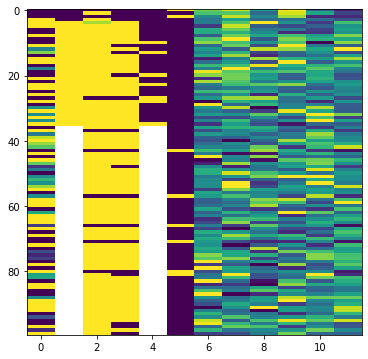

In [55]:
plt.figure(figsize=(6,6))
plt.imshow(df.sort_values('ls_interval__0_grad').values, vmin=-2, vmax=2, aspect='auto')


## Walking the gradients

In [99]:
failing = inputs_df.values[np.isnan(grad_df.values).any(axis=1)]
passing = inputs_df.values[~np.isnan(grad_df.values).any(axis=1)]

n_vars = len(col_names)
n_steps = 30

walk_dfs = []
for i in range(30):
    start, end = passing[i], failing[i]
    position = start.copy()
    positions = []
    failed_yet = False
    for j, coord in enumerate(col_names):
        for eps in np.linspace(start[j],end[j], n_steps):
            position[j] = eps
            logp, grad =  func(position)
            is_failing = np.isnan(grad).any()
            if is_failing and not failed_yet:
                failed_yet = True
                print(f'Failed when walking along {coord} at {eps:.2f} from {start[j]:.2f} to {end[j]:.2f}')
                
            #print(position, is_failing)
            positions += [list(position) + [is_failing]]
            
    walk_df = pd.DataFrame(data=positions, columns=col_names + ['is_failing'])
    walk_dfs += [walk_df]
            

Failed when walking along ls_interval__0 at 0.96 from 0.98 to 0.62
Failed when walking along ls_interval__0 at -0.37 from -0.37 to -0.18
Failed when walking along ls_interval__0 at 1.02 from 1.06 to -0.08
Failed when walking along ls_interval__0 at 1.28 from 1.43 to -0.74
Failed when walking along ls_interval__0 at 0.61 from 1.05 to -2.15
Failed when walking along ls_interval__0 at 1.92 from 1.99 to -0.03
Failed when walking along ls_interval__0 at 0.62 from 0.81 to -0.27
Failed when walking along ls_interval__0 at 1.43 from 1.58 to 0.16
Failed when walking along ls_interval__0 at 1.25 from 1.36 to -1.90
Failed when walking along ls_interval__0 at 0.52 from 0.57 to -0.14
Failed when walking along ls_interval__0 at -0.32 from -0.32 to -0.19
Failed when walking along ls_interval__0 at 0.78 from 0.75 to 1.45
Failed when walking along ls_interval__0 at 1.58 from 1.69 to -1.64
Failed when walking along ls_interval__0 at 0.71 from 0.76 to 0.01
Failed when walking along ls_interval__0 at 0.64

KeyboardInterrupt: 

In [91]:
positions

[[1.8494374140884826,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.7952967225153682,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.741156030942254,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.6870153393691396,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.6328746477960254,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.578733956222911,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 [1.5245932646497966,
  0.975028508856975,
  0.7224459703687901,
  0.8805022236608738,
  0.41599261559902784,
  -0.4696397758344442,
  False],
 